In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import gzip
from tinygrad.tensor import Tensor
from tinygrad.helpers import fetch


from nn_raw import *
from nn_opt import *

In [5]:
def _fetch_mnist(file, offset): return Tensor(gzip.open(fetch("https://storage.googleapis.com/cvdf-datasets/mnist/"+file)).read()[offset:])
def mnist():
  return _fetch_mnist("train-images-idx3-ubyte.gz", 0x10).reshape(-1, 1, 28, 28), _fetch_mnist("train-labels-idx1-ubyte.gz", 8), \
         _fetch_mnist("t10k-images-idx3-ubyte.gz", 0x10).reshape(-1, 1, 28, 28), _fetch_mnist("t10k-labels-idx1-ubyte.gz", 8)

In [6]:
train_imgs, train_lbs, test_imgs, test_lbs = mnist()
train_imgs, train_lbs, test_imgs, test_lbs = train_imgs.numpy(), train_lbs.numpy(), test_imgs.numpy(), test_lbs.numpy()

label is: 5


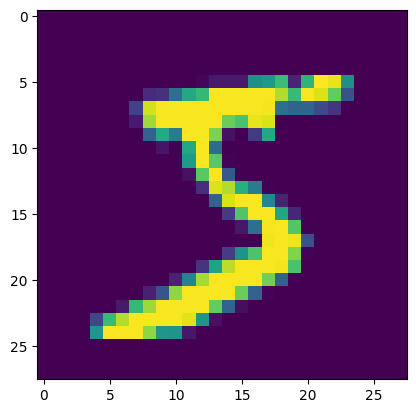

In [5]:
plt.imshow(train_imgs[0].reshape(28,28,1))
print(f"label is: {train_lbs[0]}")

trainy = train_imgs[0]

In [42]:
N_INPUT = 784
N_HIDDEN_1 = 128
N_OUT = 10
LR = 0.001

# raw numpy, very slow

In [7]:
x_train = flatten(train_imgs)

In [97]:
weights_1_init = np.random.randn(N_INPUT, N_HIDDEN_1) * 0.01
bias_1_init = np.zeros(N_HIDDEN_1)

weights_2_init = np.random.randn(N_HIDDEN_1, N_OUT) * 0.01
bias_2_init = np.zeros(N_OUT)

In [102]:
epoch_loss = []
for i in range(x_train.shape[0]):
	one_hot_label = onehot(train_lbs[i])

	z1 = hidden_layer(x_train[i], weights_1, bias_1)
	# print(f"Preactivations of layer 0 has shape: {z1.shape}")
	a1 = np.array([relu(z1[i]) for i in range(z1.shape[0])])
	# print(f"Postactivations of layer 0 has shape: {a1.shape}")
	z2 = hidden_layer(a1, weights_2, bias_2)
	# print(f"Preactivations of layer 1 has shape: {z2.shape}")
	logits = softmax(z2)
	# print(f"logits of layer 1 has shape: {logits.shape}")

	loss = cross_entropy_loss(logits, one_hot_label)
	epoch_loss.append(loss)

	grad_w2, grad_b2 = backward_out(logits, one_hot_label, a1)
	# print(f"Gradients of W2 have shape: {grad_w2.shape}")
	grad_w1, grad_b1 = backward_hidden(x_train[i], weights_2, grad_b2)
	# print(f"Gradients of W1 have shape: {grad_w1.shape}")

	weights_1 = update(weights_1, grad_w1, LR)
	weights_2 = update(weights_2, grad_w2, LR)
	bias_1 = update(bias_1, grad_b1, LR)
	bias_2 = update(bias_2, grad_b2, LR)
	if i%1000 == 0:
		print(f"Progress: {round((i+1) / x_train.shape[0] * 100)} % | loss: {round(sum(epoch_loss) / len(epoch_loss))}")

    

Progress: 0 % | loss: 2
Progress: 2 % | loss: 2
Progress: 3 % | loss: 2
Progress: 5 % | loss: 2
Progress: 7 % | loss: 2
Progress: 8 % | loss: 2
Progress: 10 % | loss: 2
Progress: 12 % | loss: 2
Progress: 13 % | loss: 2
Progress: 15 % | loss: 2
Progress: 17 % | loss: 2
Progress: 18 % | loss: 2
Progress: 20 % | loss: 2
Progress: 22 % | loss: 2
Progress: 23 % | loss: 2
Progress: 25 % | loss: 2
Progress: 27 % | loss: 2
Progress: 28 % | loss: 2
Progress: 30 % | loss: 2
Progress: 32 % | loss: 2
Progress: 33 % | loss: 2
Progress: 35 % | loss: 2
Progress: 37 % | loss: 2
Progress: 38 % | loss: 2
Progress: 40 % | loss: 2
Progress: 42 % | loss: 2
Progress: 43 % | loss: 2
Progress: 45 % | loss: 2
Progress: 47 % | loss: 2
Progress: 48 % | loss: 2
Progress: 50 % | loss: 2
Progress: 52 % | loss: 2
Progress: 53 % | loss: 2
Progress: 55 % | loss: 2
Progress: 57 % | loss: 2
Progress: 58 % | loss: 2
Progress: 60 % | loss: 2
Progress: 62 % | loss: 2
Progress: 63 % | loss: 2
Progress: 65 % | loss: 2
Progre

In [103]:
epoch_loss[-1]

np.float64(2.311087564840542)

In [104]:
epoch_loss

[np.float64(2.3858187560153543),
 np.float64(2.3176484092503395),
 np.float64(2.3353748332670845),
 np.float64(2.2294254274506167),
 np.float64(2.309376908332236),
 np.float64(2.306271311970633),
 np.float64(2.228754606764246),
 np.float64(2.2722661078047115),
 np.float64(2.227980556876018),
 np.float64(2.335073700604076),
 np.float64(2.271582819314587),
 np.float64(2.3858424645128022),
 np.float64(2.270784148600436),
 np.float64(2.2939132954904697),
 np.float64(2.2276305516306207),
 np.float64(2.2795262129900333),
 np.float64(2.306390815179603),
 np.float64(2.3106549148227535),
 np.float64(2.29342720444448),
 np.float64(2.309888824121379),
 np.float64(2.3351429715777217),
 np.float64(2.318638642824963),
 np.float64(2.30918095348852),
 np.float64(2.22760371888053),
 np.float64(2.2267191844230116),
 np.float64(2.3062960694180283),
 np.float64(2.334733278433264),
 np.float64(2.2713511813831238),
 np.float64(2.3055944291472596),
 np.float64(2.2799685855480267),
 np.float64(2.2706656973826

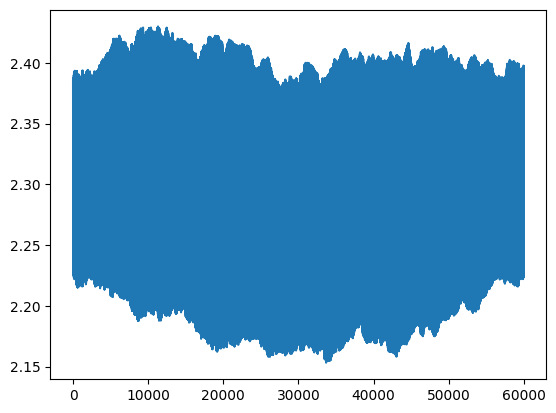

In [105]:
plt.plot(range(i+1), epoch_loss)

# slightly optimized (numpy)

In [7]:
x_train = flatten(train_imgs)
EPOCHS = 100
LR = 0.01
BS = 16

weights_1 = np.random.randn(N_INPUT, N_HIDDEN_1) * 0.01
bias_1 = np.zeros(N_HIDDEN_1)

weights_2 = np.random.randn(N_HIDDEN_1, N_OUT) * 0.01
bias_2 = np.zeros(N_OUT)

In [10]:
loss_all = []
for epoch in range(EPOCHS):
	epoch_loss = []
	for i in range(0, x_train.shape[0], BS):
		batch_imgs = x_train[i:i+BS]
		one_hot_labels = onehot(train_lbs[i:i+BS])

		z1 = hidden_layer(batch_imgs, weights_1, bias_1)
		a1 = relu(z1)
		z2 = hidden_layer(a1, weights_2, bias_2)
		logits = softmax(z2)

		loss = cross_entropy_loss(logits, one_hot_labels)
		epoch_loss.append(loss)

		dw_out, db_out, dz_out = backward_out(logits, one_hot_labels, a1)
		dw_hidden_1, db_hidden_1 = backward_hidden(batch_imgs, weights_2, dz_out)

		weights_1 = update(weights_1, dw_hidden_1, LR)
		weights_2 = update(weights_2, dw_out, LR)
		bias_1 = update(bias_1, db_hidden_1, LR)
		bias_2 = update(bias_2, db_out, LR)
		
	if epoch%10 == 0:
		print(f"EPOCH: {epoch+1} | Progress: {round((epoch+1) / EPOCHS * 100)} % | loss: {round(sum(epoch_loss) / len(epoch_loss), 4)}")
	
	loss_all.append(sum(epoch_loss) / len(epoch_loss))
    

EPOCH: 1 | Progress: 1 % | loss: 2.3018
EPOCH: 11 | Progress: 11 % | loss: 2.3014


Text(0.5, 1.0, 'BS:1, LR: 0.01')

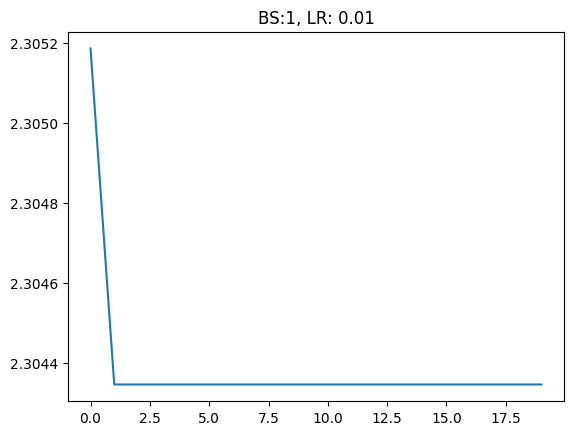

In [135]:
plt.plot(range(epoch), loss_all)
plt.title("BS:1, LR: 0.01")

Text(0.5, 1.0, 'BS:1, LR: 0.1')

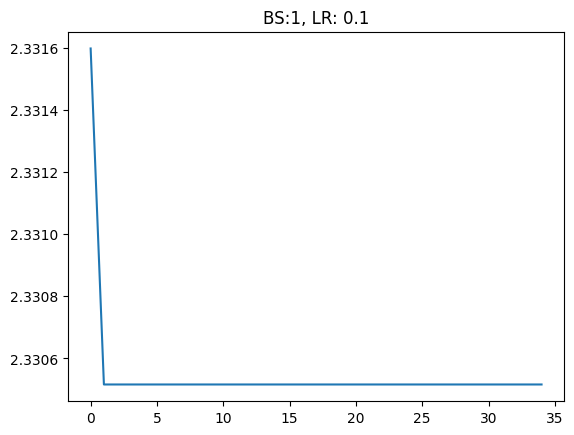

In [137]:
plt.plot(range(epoch), loss_all)
plt.title("BS:1, LR: 0.1")

Text(0.5, 1.0, 'BS:1, LR: 0.1')

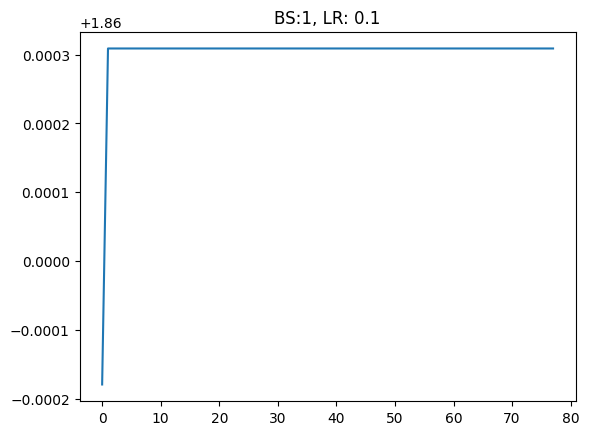

In [198]:
plt.plot(range(epoch), loss_all)
plt.title(f"BS:1, LR: {LR}")